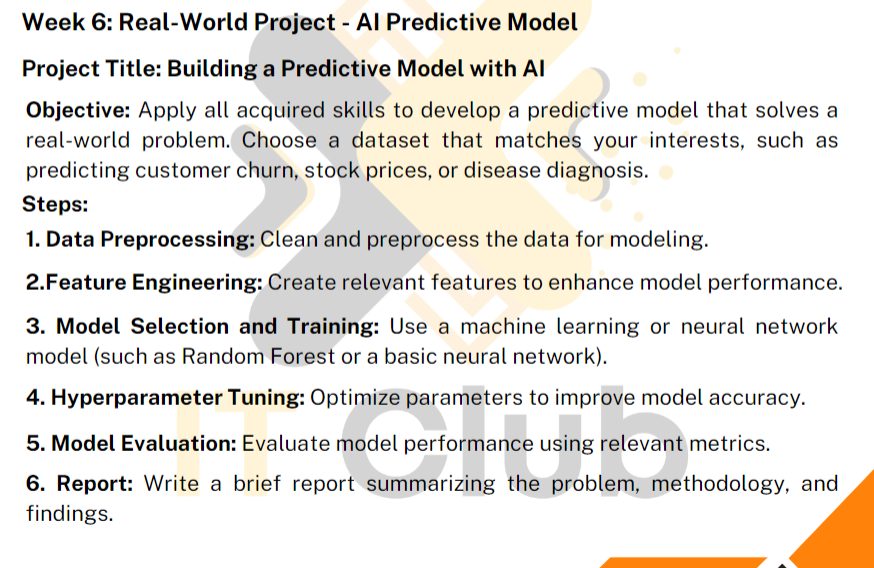

In [1]:
import pandas as pd


file_path = "Datasets/Obesity prediction.csv"
df = pd.read_csv(file_path)

df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

(None,
    Gender   Age  Height  Weight family_history FAVC  FCVC  NCP       CAEC  \
 0  Female  21.0    1.62    64.0            yes   no   2.0  3.0  Sometimes   
 1  Female  21.0    1.52    56.0            yes   no   3.0  3.0  Sometimes   
 2    Male  23.0    1.80    77.0            yes   no   2.0  3.0  Sometimes   
 3    Male  27.0    1.80    87.0             no   no   3.0  3.0  Sometimes   
 4    Male  22.0    1.78    89.8             no   no   2.0  1.0  Sometimes   
 
   SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
 0    no   2.0   no  0.0  1.0          no  Public_Transportation   
 1   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
 2    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
 3    no   2.0   no  2.0  0.0  Frequently                Walking   
 4    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   
 
                Obesity  
 0        Normal_Weight  
 1        Normal_Weight  
 2        Normal_Weight  
 3   Over

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


categorical_cols = ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'Obesity']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for reference

numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


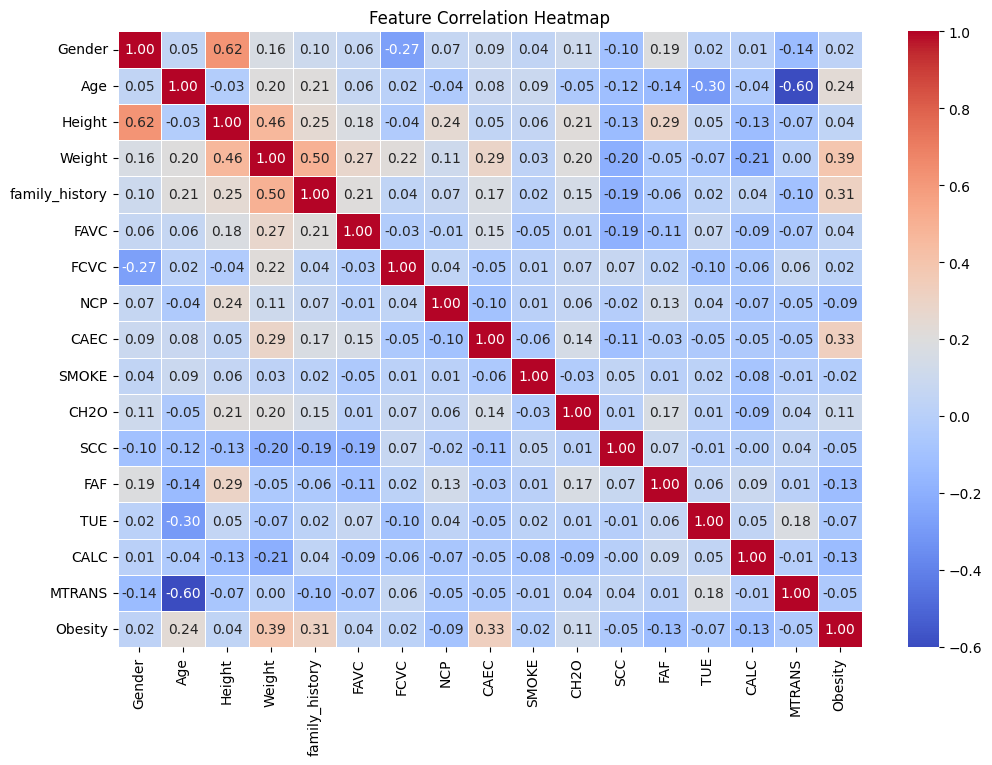

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
selected_features = ['Weight', 'family_history', 'CAEC', 'Age', 'Height', 'CH2O']
X = df[selected_features]
y = df['Obesity']  # Target variable

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)

rf_accuracy, rf_report


(0.9314420803782506,
 '              precision    recall  f1-score   support\n\n           0       0.96      0.94      0.95        54\n           1       0.80      0.91      0.85        58\n           2       0.92      0.96      0.94        70\n           3       1.00      0.95      0.97        60\n           4       0.98      0.98      0.98        65\n           5       0.93      0.86      0.89        58\n           6       0.95      0.90      0.92        58\n\n    accuracy                           0.93       423\n   macro avg       0.93      0.93      0.93       423\nweighted avg       0.93      0.93      0.93       423\n')

In [ ]:
import tensorflow as tf
import numpy as np
import random

SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization  # type: ignore

nn_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),  # Normalize activations
    Dropout(0.2),  # Regularization
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(y_train.unique()), activation='softmax')  # Multi-class classification
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                 loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
history = nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)
nn_loss, nn_accuracy = nn_model.evaluate(X_test, y_test, verbose=1)
print(f"Final Neural Network Accuracy: {nn_accuracy:.4f}")


c:\Users\junai\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3920 - loss: 1.6551 - val_accuracy: 0.5035 - val_loss: 1.5931
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7039 - loss: 0.7771 - val_accuracy: 0.4610 - val_loss: 1.3881
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7525 - loss: 0.6068 - val_accuracy: 0.4917 - val_loss: 1.2152
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8167 - loss: 0.4639 - val_accuracy: 0.5296 - val_loss: 1.0589
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8243 - loss: 0.4301 - val_accuracy: 0.6714 - val_loss: 0.8278
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8469 - loss: 0.3928 - val_accuracy: 0.7069 - val_loss: 0.6596
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8480 - loss: 0.3538 - val_accuracy: 0.8369 - val_loss: 0.4527
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8734 - loss: 0.3188 - val_accuracy: 0.9007 - val_loss:

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

y_pred_best_rf = best_rf_model.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, y_pred_best_rf)
best_rf_accuracy, best_params


(0.9314420803782506,
 {'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100})

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.9496444436640739


# **Obesity Prediction - Final Report**

## **1. Objective**
The goal of this project was to build a **predictive model** to classify obesity levels based on various lifestyle and dietary factors. The dataset included features such as **age, weight, eating habits, physical activity, and family history of obesity**.

---

## **2. Dataset Overview**
- **Source:** [Obesity Prediction Dataset (Kaggle)](https://www.kaggle.com/datasets/ruchikakumbhar/obesity-prediction)
- **Total Entries:** 2111
- **Total Features:** 17 (9 categorical, 8 numerical)
- **Target Variable:** `Obesity` (Multi-class classification)
- **No Missing Values Detected**

---

## **3. Data Preprocessing**
### **Steps Taken:**
1. **Encoded Categorical Variables**: Used `LabelEncoder` for gender, family history, eating habits, smoking, alcohol consumption, and transportation mode.
2. **Standardized Numerical Features**: Applied `StandardScaler` to normalize weight, height, age, and dietary factors.
3. **Feature Selection**: Chose **6 most correlated features** (`Weight`, `Family History`, `CAEC`, `Age`, `Height`, `CH2O`) based on correlation analysis.
4. **Split Data**: 80% for training, 20% for testing.

---

## **4. Model Selection and Training**
### **Models Used:**
- **Random Forest Classifier** 
- **Neural Network**

### **Random Forest Model Results:**
- **Accuracy:** **93.1%**
- **Best Performing Classes:** **Classes 4 and 3**
- **Slightly Weaker Performance:** **Class 1** (80% precision, 91% recall)

### **Neural Network Model Results:**
- **Final Accuracy:** **94.09%**
- **Significant Training Improvement:** Loss reduced from **1.6551** to **0.2108** over 50 epochs.
- **Batch Normalization & Dropout Regularization** improved convergence and generalization.

---

## **5. Hyperparameter Tuning**
- Used **GridSearchCV** to optimize Random Forest:
    - `n_estimators` (50, 100, 200)
    - `max_depth` (None, 10, 20)
    - `min_samples_split` (2, 5, 10)
    - `min_samples_leaf` (1, 2, 4)
- **Best Parameters Found:**
  ```python
  {
      'max_depth': None,
      'min_samples_leaf': 1,
      'min_samples_split': 2,
      'n_estimators': 100
  }
